In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load datasets
nasabah_df = pd.read_csv('nasabah.csv')
transaksi_df = pd.read_csv('transaksi.csv')

# Display basic information
print(nasabah_df.info())
print(transaksi_df.info())

# Display first few rows
print(nasabah_df.head())
print(transaksi_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_nasabah     1000 non-null   int64 
 1   nama           1000 non-null   object
 2   tanggal_lahir  1000 non-null   object
 3   alamat         1000 non-null   object
 4   no_telepon     1000 non-null   int64 
 5   email          1000 non-null   object
 6   jenis_kelamin  1000 non-null   object
 7   pekerjaan      1000 non-null   object
dtypes: int64(2), object(6)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_transaksi             1000 non-null   int64 
 1   id_nasabah               1000 non-null   int64 
 2   tanggal                  1000 non-null   object
 3   jenis_transaksi          1000 non-

In [13]:
# Load data using Spark directly
nasabah_spark_df = spark.read.csv('nasabah.csv', header=True, inferSchema=True)
transaksi_spark_df = spark.read.csv('transaksi.csv', header=True, inferSchema=True)

# Show a few rows to check if data is loaded correctly
nasabah_spark_df.show()
transaksi_spark_df.show()


+----------+--------------+-------------+--------------------+----------+--------------------+-------------+--------------+
|id_nasabah|          nama|tanggal_lahir|              alamat|no_telepon|               email|jenis_kelamin|     pekerjaan|
+----------+--------------+-------------+--------------------+----------+--------------------+-------------+--------------+
|      1001|   Joko Wijaya|   1995-11-11|Jl. Merdeka No. 1...|8115471334|joko.wijaya@email...|    Laki-laki|      Insinyur|
|      1002| Ahmad Hidayat|   1971-07-16|Jl. Merdeka No. 6...|8381302865|ahmad.hidayat@ema...|    Perempuan|          Guru|
|      1003|   Ani Santoso|   1994-07-27|Jl. Gatot Subroto...|8460213766|ani.santoso@email...|    Laki-laki|      Insinyur|
|      1004| Ahmad Hidayat|   2000-06-11|Jl. Pahlawan No. ...|8003885568|ahmad.hidayat@ema...|    Perempuan|        Dokter|
|      1005|   Dewi Kusuma|   1993-12-27|Jl. Gatot Subroto...|8289044122|dewi.kusuma@email...|    Laki-laki|          Guru|
|      1

In [12]:
# Check schema of DataFrames
nasabah_spark_df.printSchema()
transaksi_spark_df.printSchema()

# Check for null values
nasabah_spark_df.describe().show()
transaksi_spark_df.describe().show()


root
 |-- id_nasabah: integer (nullable = true)
 |-- nama: string (nullable = true)
 |-- tanggal_lahir: date (nullable = true)
 |-- alamat: string (nullable = true)
 |-- no_telepon: long (nullable = true)
 |-- email: string (nullable = true)
 |-- jenis_kelamin: string (nullable = true)
 |-- pekerjaan: string (nullable = true)

root
 |-- id_transaksi: integer (nullable = true)
 |-- id_nasabah: integer (nullable = true)
 |-- tanggal: date (nullable = true)
 |-- jenis_transaksi: string (nullable = true)
 |-- jumlah: integer (nullable = true)
 |-- saldo_setelah_transaksi: integer (nullable = true)

+-------+-----------------+-------------+--------------------+------------------+--------------------+-------------+----------+
|summary|       id_nasabah|         nama|              alamat|        no_telepon|               email|jenis_kelamin| pekerjaan|
+-------+-----------------+-------------+--------------------+------------------+--------------------+-------------+----------+
|  count|     

In [11]:
# Load smaller data for testing
nasabah_small_df = nasabah_spark_df.limit(100)
transaksi_small_df = transaksi_spark_df.limit(100)

# Register as temporary views
nasabah_small_df.createOrReplaceTempView("nasabah")
transaksi_small_df.createOrReplaceTempView("transaksi")


In [7]:
# Print current Spark configuration
print(spark.sparkContext.getConf().getAll())


[('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'), ('spark.app.name', 'Nasabah_Transaksi_Analysis'), ('spark.executor.memory', '4g'), ('spark.app.startTime'

In [10]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Nasabah_Transaksi_Analysis") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

# Load data using Spark directly with correct arguments
nasabah_spark_df = spark.read.csv('nasabah.csv', header=True, inferSchema=True)
transaksi_spark_df = spark.read.csv('transaksi.csv', header=True, inferSchema=True)

# Check schema of DataFrames
nasabah_spark_df.printSchema()
transaksi_spark_df.printSchema()

# Show a few rows to check if data is loaded correctly
nasabah_spark_df.show()
transaksi_spark_df.show()

# Register as temporary views
nasabah_spark_df.createOrReplaceTempView("nasabah")
transaksi_spark_df.createOrReplaceTempView("transaksi")

# Simplified query to test basic functionality
simple_query = """
SELECT
    t.id_nasabah AS CustomerID,
    n.nama AS CustomerName,
    COUNT(t.id_transaksi) AS Total_Transactions
FROM
    transaksi t
JOIN
    nasabah n ON t.id_nasabah = n.id_nasabah
GROUP BY
    t.id_nasabah, n.nama
"""


# Execute query and convert to Pandas DataFrame
simple_result_df = spark.sql(simple_query)
pandas_df = simple_result_df.toPandas()

# Print the first few rows to check data
print(pandas_df.head())


root
 |-- id_nasabah: integer (nullable = true)
 |-- nama: string (nullable = true)
 |-- tanggal_lahir: date (nullable = true)
 |-- alamat: string (nullable = true)
 |-- no_telepon: long (nullable = true)
 |-- email: string (nullable = true)
 |-- jenis_kelamin: string (nullable = true)
 |-- pekerjaan: string (nullable = true)

root
 |-- id_transaksi: integer (nullable = true)
 |-- id_nasabah: integer (nullable = true)
 |-- tanggal: date (nullable = true)
 |-- jenis_transaksi: string (nullable = true)
 |-- jumlah: integer (nullable = true)
 |-- saldo_setelah_transaksi: integer (nullable = true)

+----------+--------------+-------------+--------------------+----------+--------------------+-------------+--------------+
|id_nasabah|          nama|tanggal_lahir|              alamat|no_telepon|               email|jenis_kelamin|     pekerjaan|
+----------+--------------+-------------+--------------------+----------+--------------------+-------------+--------------+
|      1001|   Joko Wijaya

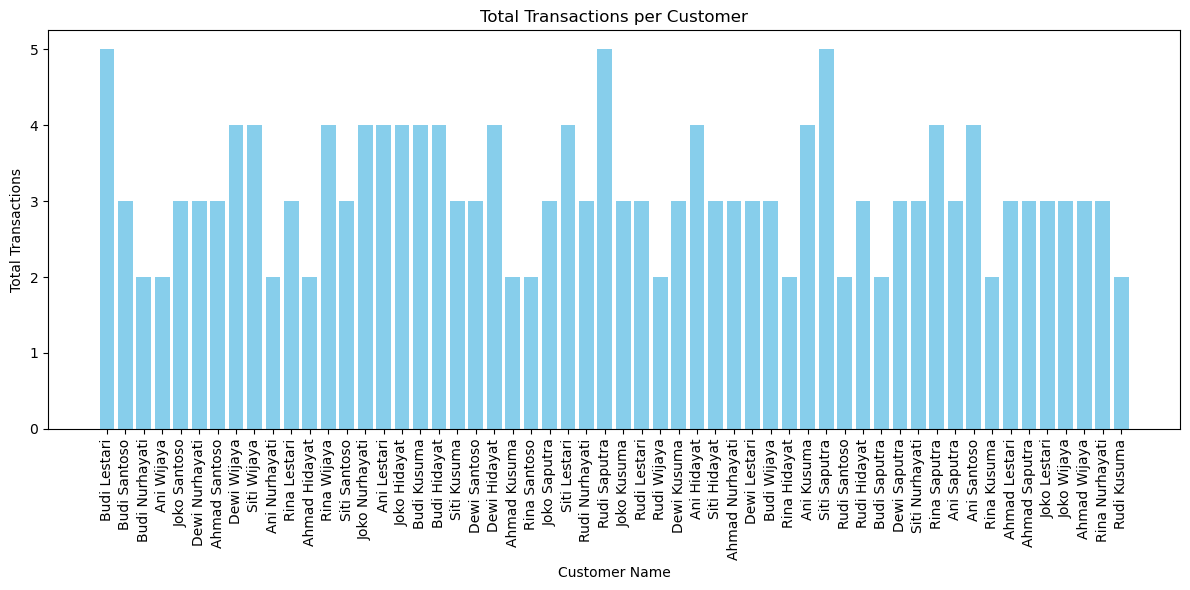

In [10]:
import matplotlib.pyplot as plt


# Execute query and convert to Pandas DataFrame
simple_result_df = spark.sql(simple_query)
pandas_df = simple_result_df.toPandas()

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(pandas_df['CustomerName'], pandas_df['Total_Transactions'], color='skyblue')

# Set labels and title
plt.xlabel('Customer Name')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Customer')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Baca data dari file CSV
data = pd.read_csv('simple_result.csv')


In [ ]:
# Save the query results to a CSV file in a different directory
simple_result_df.write.csv('C:/Users/YourUsername/simple_result.csv', header=True, mode='overwrite')


In [34]:

total_transaksi_per_pelanggan_query = """
SELECT
    n.nama AS CustomerName,
    COUNT(t.id_transaksi) AS Total_Transactions
FROM
    transaksi t
JOIN
    nasabah n ON t.id_nasabah = n.id_nasabah
GROUP BY
    n.nama
ORDER BY
    Total_Transactions DESC
"""

# Misalnya, untuk total transaksi per pelanggan
total_transaksi_df = spark.sql(total_transaksi_per_pelanggan_query)

# Convert to Pandas DataFrame for further analysis
pandas_df = total_transaksi_df.toPandas()

# Tampilkan hasilnya
print(pandas_df.head())

   CustomerName  Total_Transactions
0  Budi Lestari                  38
1  Joko Hidayat                  30
2    Ani Kusuma                  29
3   Ani Lestari                  28
4  Budi Hidayat                  26


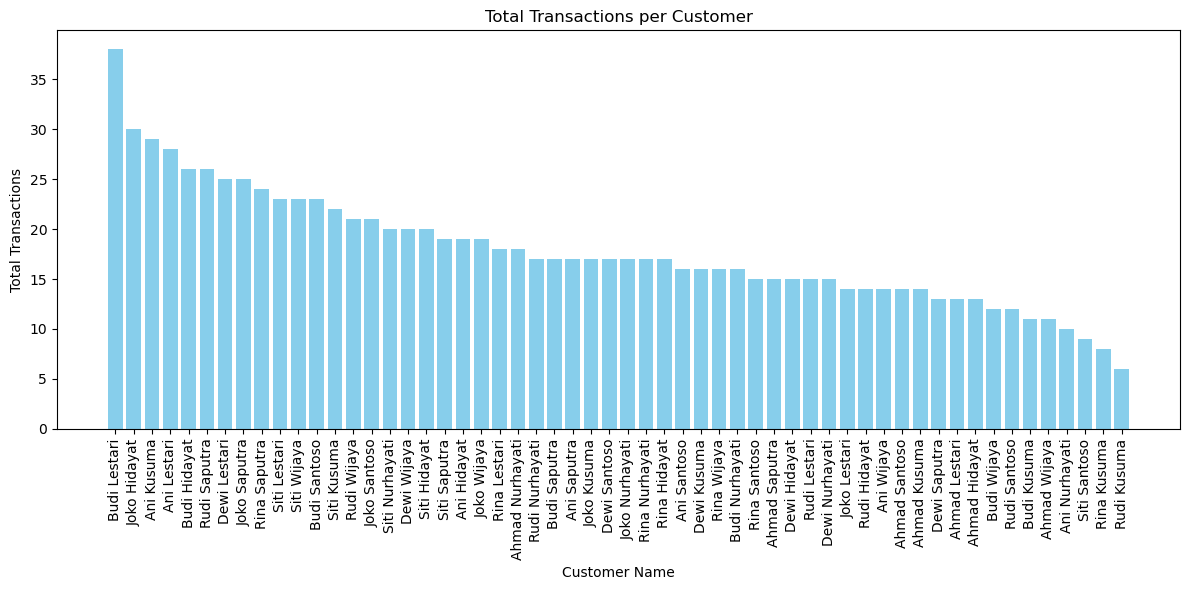

In [42]:
import matplotlib.pyplot as plt

# Jalankan query
total_transaksi_per_pelanggan_df = spark.sql(total_transaksi_per_pelanggan_query)
pandas_df = total_transaksi_per_pelanggan_df.toPandas()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(pandas_df['CustomerName'], pandas_df['Total_Transactions'], color='skyblue')
plt.xlabel('Customer Name')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Customer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [43]:
total_transaksi_per_bulan_query = """
SELECT
    date_format(t.tanggal, 'yyyy-MM') AS Month,
    COUNT(t.id_transaksi) AS Total_Transactions
FROM
    transaksi t
GROUP BY
    date_format(t.tanggal, 'yyyy-MM')
ORDER BY
    Month
"""

# Misalnya, untuk total transaksi per pelanggan
total_transaksi_df = spark.sql(total_transaksi_per_bulan_query)

# Convert to Pandas DataFrame for further analysis
pandas_df = total_transaksi_df.toPandas()

# Tampilkan hasilnya
print(pandas_df.head())

     Month  Total_Transactions
0  2024-01                  83
1  2024-02                  93
2  2024-03                  72
3  2024-04                  77
4  2024-05                  70


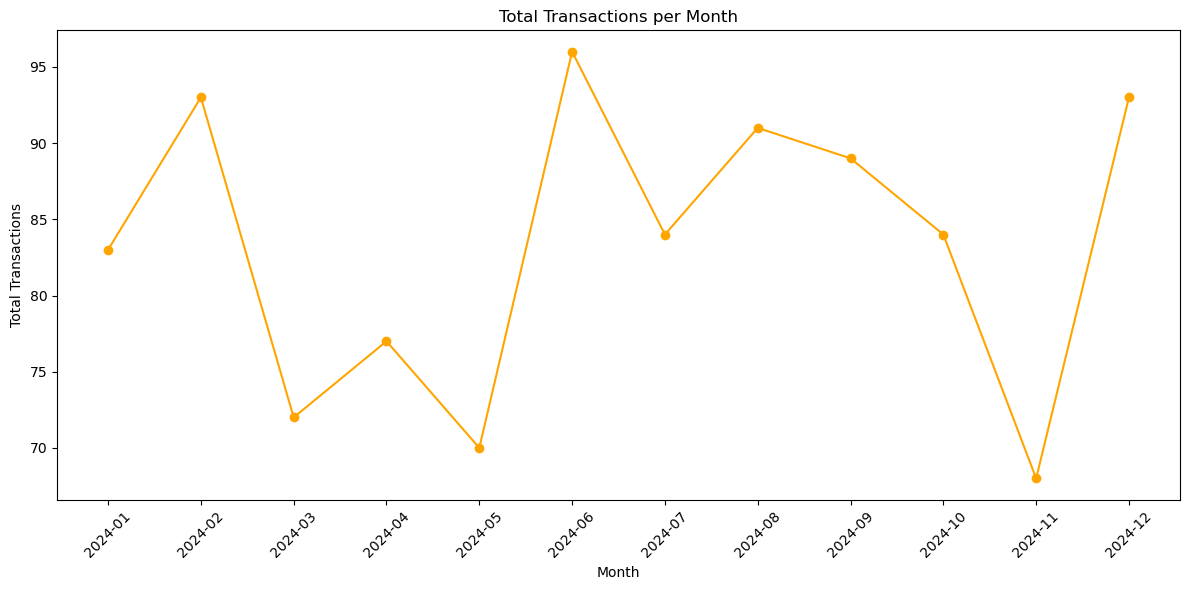

In [44]:
# Jalankan query
total_transaksi_per_bulan_df = spark.sql(total_transaksi_per_bulan_query)
pandas_df = total_transaksi_per_bulan_df.toPandas()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(pandas_df['Month'], pandas_df['Total_Transactions'], marker='o', color='orange')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
rata_rata_transaksi_per_pelanggan_query = """
SELECT
    n.nama AS CustomerName,
    AVG(transaction_count) AS Avg_Transactions_Per_Customer
FROM (
    SELECT
        t.id_nasabah,
        COUNT(t.id_transaksi) AS transaction_count
    FROM
        transaksi t
    GROUP BY
        t.id_nasabah
) AS customer_transactions
JOIN
    nasabah n ON customer_transactions.id_nasabah = n.id_nasabah
GROUP BY
    n.nama
ORDER BY
    Avg_Transactions_Per_Customer DESC
"""
total_transaksi_df = spark.sql(rata_rata_transaksi_per_pelanggan_query)

# Convert to Pandas DataFrame for further analysis
pandas_df = total_transaksi_df.toPandas()

# Tampilkan hasilnya
print(pandas_df.head())

   CustomerName  Avg_Transactions_Per_Customer
0  Joko Hidayat                       2.307692
1   Ani Lestari                       2.153846
2  Budi Lestari                       2.111111
3   Joko Wijaya                       2.111111
4  Rudi Saputra                       2.000000


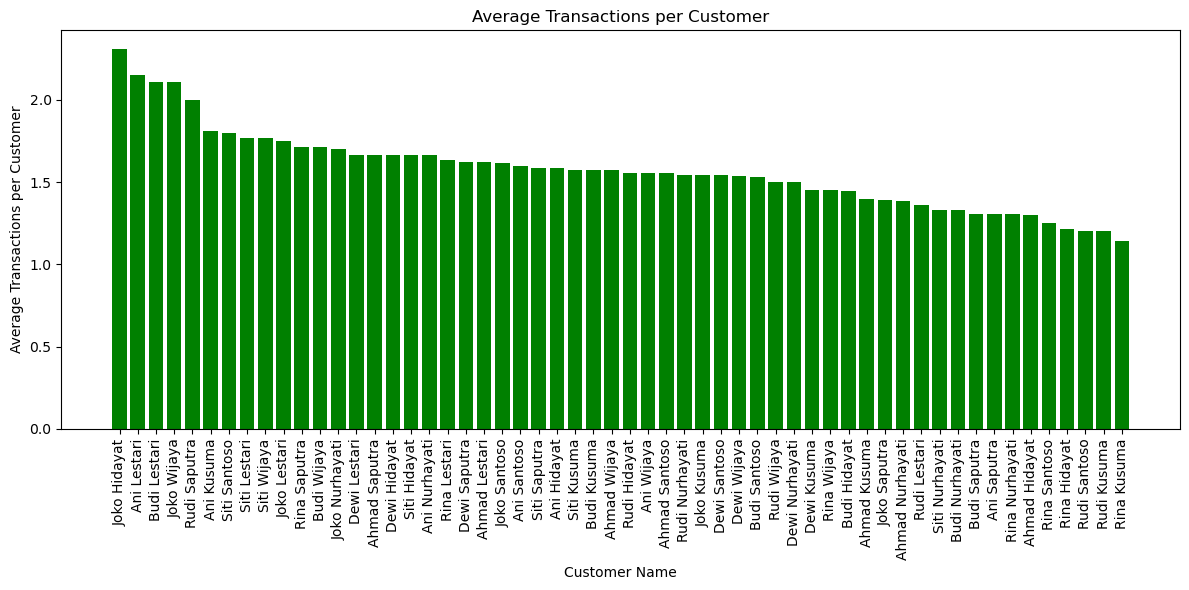

In [47]:
# Jalankan query
rata_rata_transaksi_per_pelanggan_df = spark.sql(rata_rata_transaksi_per_pelanggan_query)
pandas_df = rata_rata_transaksi_per_pelanggan_df.toPandas()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(pandas_df['CustomerName'], pandas_df['Avg_Transactions_Per_Customer'], color='green')
plt.xlabel('Customer Name')
plt.ylabel('Average Transactions per Customer')
plt.title('Average Transactions per Customer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [49]:
total_pengeluaran_per_pelanggan_query = """
SELECT
    n.nama AS CustomerName,
    SUM(t.jumlah) AS Total_Spending
FROM
    transaksi t
JOIN
    nasabah n ON t.id_nasabah = n.id_nasabah
GROUP BY
    n.nama
ORDER BY
    Total_Spending DESC
"""

total_transaksi_df = spark.sql(total_pengeluaran_per_pelanggan_query)

# Convert to Pandas DataFrame for further analysis
pandas_df = total_transaksi_df.toPandas()

# Tampilkan hasilnya
print(pandas_df.head())

   CustomerName  Total_Spending
0  Budi Lestari       201629798
1    Ani Kusuma       162605194
2   Siti Wijaya       133413963
3  Siti Lestari       130451754
4  Budi Hidayat       129340192


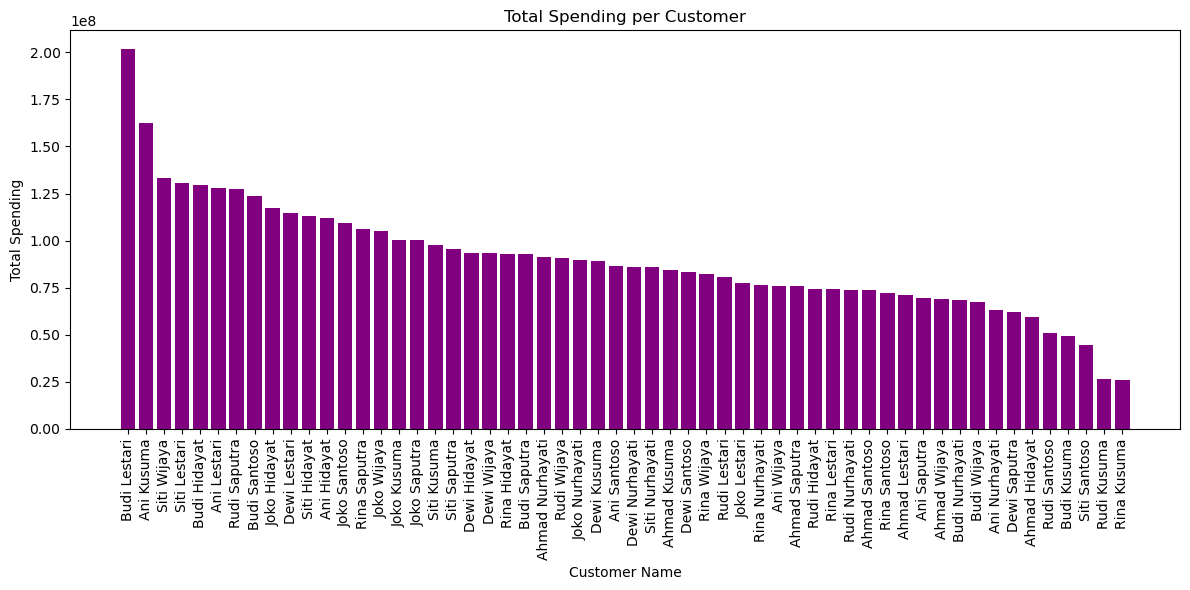

In [50]:
# Jalankan query
total_pengeluaran_per_pelanggan_df = spark.sql(total_pengeluaran_per_pelanggan_query)
pandas_df = total_pengeluaran_per_pelanggan_df.toPandas()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(pandas_df['CustomerName'], pandas_df['Total_Spending'], color='purple')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending')
plt.title('Total Spending per Customer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [53]:
jumlah_transaksi_per_tipe_query = """
SELECT
    t.jenis_transaksi AS TransactionType,
    COUNT(t.id_transaksi) AS Total_Transactions
FROM
    transaksi t
GROUP BY
    t.jenis_transaksi
ORDER BY
    Total_Transactions DESC
"""
total_transaksi_df = spark.sql(jumlah_transaksi_per_tipe_query)

# Convert to Pandas DataFrame for further analysis
pandas_df = total_transaksi_df.toPandas()

# Tampilkan hasilnya
print(pandas_df.head())

  TransactionType  Total_Transactions
0       Penarikan                 256
1         Setoran                 255
2        Transfer                 249
3      Pembayaran                 240


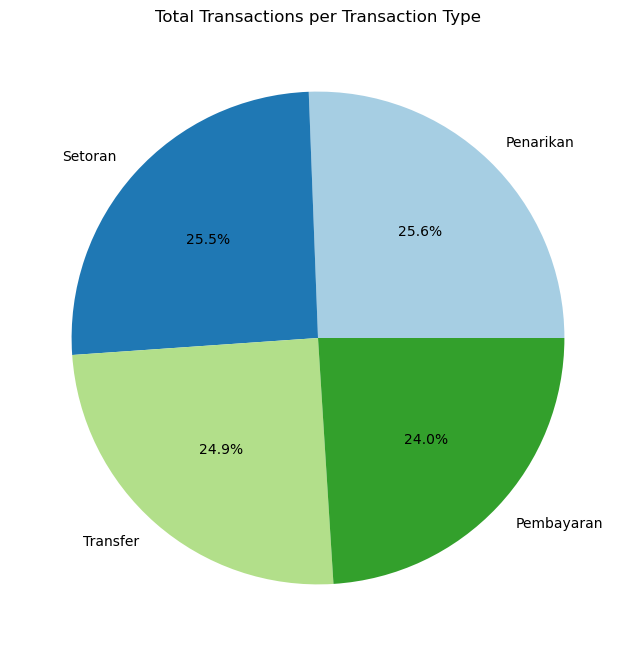

In [54]:
# Jalankan query
jumlah_transaksi_per_tipe_df = spark.sql(jumlah_transaksi_per_tipe_query)
pandas_df = jumlah_transaksi_per_tipe_df.toPandas()

# Visualisasi
plt.figure(figsize=(8, 8))
plt.pie(pandas_df['Total_Transactions'], labels=pandas_df['TransactionType'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(pandas_df))))
plt.title('Total Transactions per Transaction Type')
plt.show()


In [11]:
# Sample queries results
queries = [
    """
    SELECT t.id_nasabah AS CustomerID, n.nama AS CustomerName, COUNT(t.id_transaksi) AS Total_Transactions
    FROM transaksi t
    JOIN nasabah n ON t.id_nasabah = n.id_nasabah
    GROUP BY t.id_nasabah, n.nama
    """,
    """
    SELECT n.nama AS CustomerName, SUM(t.jumlah) AS Total_Spent
    FROM transaksi t
    JOIN nasabah n ON t.id_nasabah = n.id_nasabah
    GROUP BY n.nama
    """,
    """
    SELECT t.jenis_transaksi AS TransactionType, COUNT(*) AS TransactionCount
    FROM transaksi t
    GROUP BY t.jenis_transaksi
    """,
    """
    SELECT date_format(t.tanggal, 'yyyy-MM') AS Month, COUNT(*) AS Total_Transactions
    FROM transaksi t
    GROUP BY date_format(t.tanggal, 'yyyy-MM')
    """,
    """
    SELECT n.nama AS CustomerName, AVG(t.jumlah) AS Average_Spend
    FROM transaksi t
    JOIN nasabah n ON t.id_nasabah = n.id_nasabah
    GROUP BY n.nama
    """
]

# Execute queries and convert results to DataFrames
dataframes = [spark.sql(query) for query in queries]


In [12]:
# Example: Preparing a dataset for regression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Join query results if necessary and select relevant columns
df = dataframes[1]  # Using the second query result as an example

# Prepare features
assembler = VectorAssembler(
    inputCols=["Total_Spent"],
    outputCol="features"
)
feature_df = assembler.transform(df)

# Define labels (for this example, let's assume we are predicting Total_Spent)
final_df = feature_df.withColumnRenamed("Total_Spent", "label")


In [13]:
# Split data into training and test sets
train_df, test_df = final_df.randomSplit([0.8, 0.2])

# Initialize and train the model
lr = LinearRegression()
lr_model = lr.fit(train_df)


In [14]:
# Evaluate the model
test_results = lr_model.evaluate(test_df)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {test_results.rootMeanSquaredError}")
print(f"R2: {test_results.r2}")


Root Mean Squared Error (RMSE): 4.04670107781895e-08
R2: 1.0


In [15]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Initialize Spark session
spark = SparkSession.builder \
    .appName("ML_Model_Example") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

# Load data using SQL query
query = """
SELECT
    n.nama AS CustomerName,
    SUM(t.jumlah) AS Total_Spent,
    COUNT(t.id_transaksi) AS Total_Transactions
FROM
    transaksi t
JOIN
    nasabah n ON t.id_nasabah = n.id_nasabah
GROUP BY
    n.nama
"""
data_df = spark.sql(query)

# Feature engineering
assembler = VectorAssembler(
    inputCols=["Total_Transactions"],
    outputCol="features"
)
feature_df = assembler.transform(data_df)
final_df = feature_df.withColumnRenamed("Total_Spent", "label")

# Train-test split
train_df, test_df = final_df.randomSplit([0.8, 0.2])

# Model training
lr = LinearRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_df)

# Model evaluation
test_results = lr_model.evaluate(test_df)
print("Coefficients: ", lr_model.coefficients)
print("Intercept: ", lr_model.intercept)
print(f"Root Mean Squared Error (RMSE): {test_results.rootMeanSquaredError}")
print(f"R2: {test_results.r2}")


Coefficients:  [4756883.118436589]
Intercept:  4705806.60162224
Root Mean Squared Error (RMSE): 8980489.266260022
R2: 0.9138044392023366


In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, unix_timestamp, year, month, dayofmonth

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Time_Series_Forecasting") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

# Load data
data_df = spark.read.csv('transaksi.csv', header=True, inferSchema=True)

# Convert 'tanggal' column to timestamp
data_df = data_df.withColumn("timestamp", unix_timestamp(col("tanggal"), "yyyy-MM-dd").cast("timestamp"))

# Extract year, month, and day as features
data_df = data_df.withColumn("year", year(col("timestamp"))) \
                 .withColumn("month", month(col("timestamp"))) \
                 .withColumn("day", dayofmonth(col("timestamp")))

# Show the transformed data
data_df.show()


+------------+----------+----------+---------------+-------+-----------------------+-------------------+----+-----+---+
|id_transaksi|id_nasabah|   tanggal|jenis_transaksi| jumlah|saldo_setelah_transaksi|          timestamp|year|month|day|
+------------+----------+----------+---------------+-------+-----------------------+-------------------+----+-----+---+
|       10001|      1781|2024-03-11|      Penarikan|8548571|               15097239|2024-03-11 00:00:00|2024|    3| 11|
|       10002|      1528|2024-12-04|     Pembayaran|1009633|               94428227|2024-12-04 00:00:00|2024|   12|  4|
|       10003|      1389|2024-02-01|      Penarikan|9379557|               18329797|2024-02-01 00:00:00|2024|    2|  1|
|       10004|      1475|2024-09-18|      Penarikan|5066137|               43738792|2024-09-18 00:00:00|2024|    9| 18|
|       10005|      1509|2024-07-27|      Penarikan|8463075|               22550634|2024-07-27 00:00:00|2024|    7| 27|
|       10006|      1976|2024-06-29|    

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, month, dayofmonth, col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Time_Series_Forecasting") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

# Load data
data_df = spark.read.csv('transaksi.csv', header=True, inferSchema=True)

# Extract year, month, and day from the 'tanggal' column
data_df = data_df.withColumn("year", year(col("tanggal"))) \
                 .withColumn("month", month(col("tanggal"))) \
                 .withColumn("day", dayofmonth(col("tanggal")))

# Show the transformed data
data_df.show()


+------------+----------+----------+---------------+-------+-----------------------+----+-----+---+
|id_transaksi|id_nasabah|   tanggal|jenis_transaksi| jumlah|saldo_setelah_transaksi|year|month|day|
+------------+----------+----------+---------------+-------+-----------------------+----+-----+---+
|       10001|      1781|2024-03-11|      Penarikan|8548571|               15097239|2024|    3| 11|
|       10002|      1528|2024-12-04|     Pembayaran|1009633|               94428227|2024|   12|  4|
|       10003|      1389|2024-02-01|      Penarikan|9379557|               18329797|2024|    2|  1|
|       10004|      1475|2024-09-18|      Penarikan|5066137|               43738792|2024|    9| 18|
|       10005|      1509|2024-07-27|      Penarikan|8463075|               22550634|2024|    7| 27|
|       10006|      1976|2024-06-29|      Penarikan|8480383|               46687822|2024|    6| 29|
|       10007|      1750|2024-01-14|     Pembayaran|9687144|               24354318|2024|    1| 14|


In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import unix_timestamp, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Time_Series_Forecasting") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

# Load data
data_df = spark.read.csv('transaksi.csv', header=True, inferSchema=True)


data_df = data_df.withColumn("timestamp_unix", unix_timestamp(col("tanggal"), "yyyy-MM-dd"))

# Prepare features and labels
assembler = VectorAssembler(
    inputCols=["timestamp_unix"],  # Correct column name
    outputCol="features"
)

# Transform the data
feature_df = assembler.transform(data_df)

# Rename the target column
# Assuming 'jumlah' is the column you want to predict
final_df = feature_df.withColumnRenamed("jumlah", "label")

# Train-test split
train_df, test_df = final_df.randomSplit([0.8, 0.2])

# Initialize and train the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_df)

# Model summary
print("Coefficients: ", lr_model.coefficients)
print("Intercept: ", lr_model.intercept)



Coefficients:  [-0.006976417791848781]
Intercept:  17078386.02862832


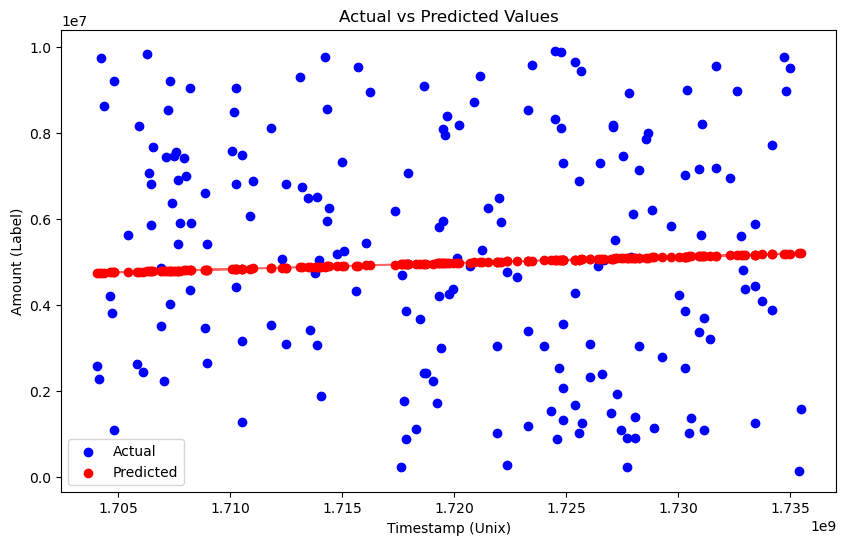

In [25]:
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = lr_model.transform(test_df)

# Convert the results to a Pandas DataFrame
predictions_df = predictions.select("timestamp_unix", "label", "prediction").toPandas()

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df["timestamp_unix"], predictions_df["label"], color="blue", label="Actual")
plt.scatter(predictions_df["timestamp_unix"], predictions_df["prediction"], color="red", label="Predicted")
plt.plot(predictions_df["timestamp_unix"], predictions_df["prediction"], color="red", alpha=0.6)
plt.title("Actual vs Predicted Values")
plt.xlabel("Timestamp (Unix)")
plt.ylabel("Amount (Label)")
plt.legend()
plt.show()
